### Dimensionality Reduction on the scaled dataset

In [31]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
import seaborn as sns

# Load your preprocessed data
df = pd.read_csv('Data/df_scaled.csv')

ImportError: Numba needs NumPy 2.2 or less. Got NumPy 2.3.

In [ ]:
df.shape

(9442, 56)

In [ ]:
df = df.drop(columns='Unnamed: 0')

In [ ]:
df.shape

(9442, 55)

In [ ]:
df.head()

,General_hearing_condition,Had_high_blood_pressure,WBC,Haemoglobin,Platelete,Age,Education_Level,Household_Size,Income_to_Poverty_Ratio,Has_diabetes,...,Race_Ethnicity_Other Hispanic,Race_Ethnicity_Other Race - Including Multi-Racial,Gender_Female,Gender_Male,Country_of_Birth_Born in 50 US states or Washington,Country_of_Birth_Unknown,Marital_Status_Married/Living with partner,Marital_Status_Never married,Marital_Status_Unknown,Marital_Status_Widowed/Divorced/Separated
0,0.0,1.0,-0.126195,0.071429,-0.206814,0.575,-0.5,-1.356915,-0.571698,0.0,...,0,0,1,0,1,0,0,1,0,0
1,0.0,0.0,0.061874,0.000000,0.133994,-0.400,-0.5,1.095512,-0.752830,0.0,...,0,0,0,1,0,1,1,0,0,0
2,0.0,1.0,-0.126195,0.071429,-0.206814,0.425,-0.5,-1.356915,-0.209434,0.0,...,0,0,1,0,1,0,0,1,0,0
3,-1.0,1.0,-0.126195,0.071429,-0.206814,0.650,0.0,-0.563171,-0.511321,0.0,...,0,0,0,1,1,0,0,0,0,1
4,0.0,2.0,1.395017,-0.714286,1.991652,-1.000,1.0,1.095512,-0.481132,0.0,...,0,1,0,1,1,0,0,0,1,0


In [ ]:
df.columns

Index(['General_hearing_condition', 'Had_high_blood_pressure', 'WBC',
       'Haemoglobin', 'Platelete', 'Age', 'Education_Level', 'Household_Size',
       'Income_to_Poverty_Ratio', 'Has_diabetes', 'Takes_vitamin_supplements',
       'Has_Disability', 'HDL_mg', 'Has_Hepatitis',
       'Covered_by_health_insurance', 'Tested_for_HIV_Virus',
       'General_health_condition', 'Received_Hepatitis_A_Vaccine',
       'Family_poverty_level_index', 'Has_Kidney_Failure', 'Had_Asthma',
       'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
       'Had_Liver_COndition', 'Had_Cancer', 'Teeth_and_gum_health',
       'Number_of_Moderate_Physical_activities_per_week',
       'Number_of_Vigorous_Physical_activities_per_week',
       'Number_of_hours_of_sleep', 'Cholestrol_level', 'SystolicBP',
       'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE', 'blood_macros',
       'mean_steroid_ng_dl', 'balance_symptom_score', 'balance_impact_score',
       'fall_risk_score', 'functional_difficulty_compos

### PCA - Dimensionality reduction technique 1

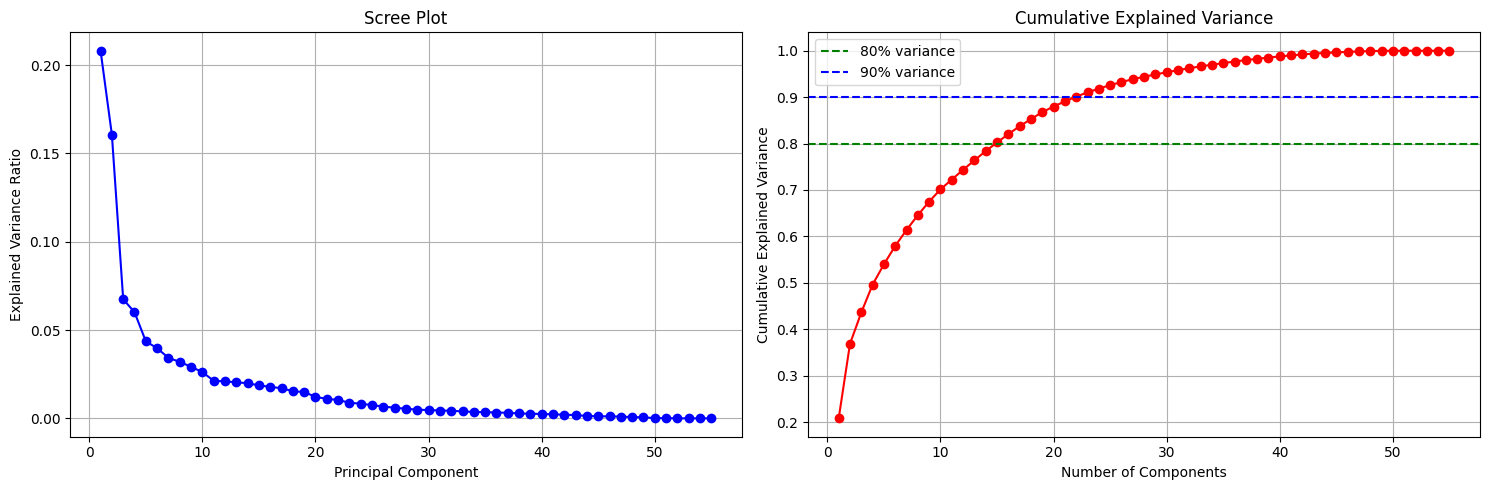

Components for 80% variance: 15
Components for 80% variance: 18
Components for 90% variance: 22


In [ ]:
# Fit PCA with all components first
pca_full = PCA()
pca_full.fit(df)

# Calculate cumulative explained variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot to find elbow
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot')
axes[0].grid(True)

# Cumulative variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
axes[1].axhline(y=0.80, color='g', linestyle='--', label='80% variance')
axes[1].axhline(y=0.90, color='b', linestyle='--', label='90% variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Find number of components for 80% and 90% variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Components for 80% variance: {n_components_80}")
print(f"Components for 80% variance: {n_components_85}")
print(f"Components for 90% variance: {n_components_90}")

### PCA With Robust Scaling - 80% variance selection

In [ ]:
# Apply PCA with components for 80% variance
import joblib 
n_components = n_components_80
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df)
joblib.dump(pca, 'Data/pca_model.pkl')
print(f"✓ PCA model saved with {n_components} components")

# Convert to DataFrame for easier handling
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

print(f"\n{'='*60}")
print(f"PCA RESULTS")
print(f"{'='*60}")
print(f"Original shape: {df.shape}")
print(f"Reduced shape: {df_pca.shape}")
print(f"Dimensionality reduction: {df.shape[1]} → {n_components} features")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")
print(f"Features reduced by: {((df.shape[1] - n_components) / df.shape[1] * 100):.1f}%")

✓ PCA model saved with 15 components

PCA RESULTS
Original shape: (9442, 55)
Reduced shape: (9442, 15)
Dimensionality reduction: 55 → 15 features
Total variance explained: 80.25%
Features reduced by: 72.7%


##### What do these components represent

In [ ]:
# Get feature contributions to each PC
components_df = pd.DataFrame(
    pca.components_,
    columns=df.columns,
    index=pca_columns
)

print(f"\n{'='*60}")
print(f"TOP CONTRIBUTING FEATURES PER COMPONENT")
print(f"{'='*60}")

# Analyze first 5 components
for i in range(min(5, n_components)):
    print(f"\n--- {pca_columns[i]} (Explains {pca.explained_variance_ratio_[i]:.2%} variance) ---")
    
    # Get top 10 absolute contributions
    pc_contributions = components_df.iloc[i].abs().sort_values(ascending=False)
    
    print("\nTop 10 Contributing Features:")
    for j, (feature, loading) in enumerate(pc_contributions.head(10).items(), 1):
        # Get actual loading (with sign)
        actual_loading = components_df.iloc[i][feature]
        print(f"  {j}. {feature}: {actual_loading:.3f} (|{loading:.3f}|)")


TOP CONTRIBUTING FEATURES PER COMPONENT

--- PC1 (Explains 20.82% variance) ---

Top 10 Contributing Features:
  1. blood_macros: 0.541 (|0.541|)
  2. Has_Kidney_Failure: -0.235 (|0.235|)
  3. Had_heart_attack: -0.235 (|0.235|)
  4. Had_Liver_COndition: -0.232 (|0.232|)
  5. Had_Thyroid: -0.227 (|0.227|)
  6. Had_Cancer: -0.225 (|0.225|)
  7. Has_Disability: -0.216 (|0.216|)
  8. Tested_for_HIV_Virus: -0.212 (|0.212|)
  9. Had_Arthritis: -0.203 (|0.203|)
  10. Had_high_blood_pressure: -0.191 (|0.191|)

--- PC2 (Explains 16.06% variance) ---

Top 10 Contributing Features:
  1. blood_macros: 0.836 (|0.836|)
  2. BODY_MEASURE_COMPOSITE: -0.161 (|0.161|)
  3. Tested_for_HIV_Virus: 0.156 (|0.156|)
  4. Had_Liver_COndition: 0.153 (|0.153|)
  5. Has_Kidney_Failure: 0.153 (|0.153|)
  6. Had_heart_attack: 0.151 (|0.151|)
  7. Had_Thyroid: 0.146 (|0.146|)
  8. Had_Cancer: 0.143 (|0.143|)
  9. Has_Disability: 0.138 (|0.138|)
  10. Had_Arthritis: 0.131 (|0.131|)

--- PC3 (Explains 6.74% variance)

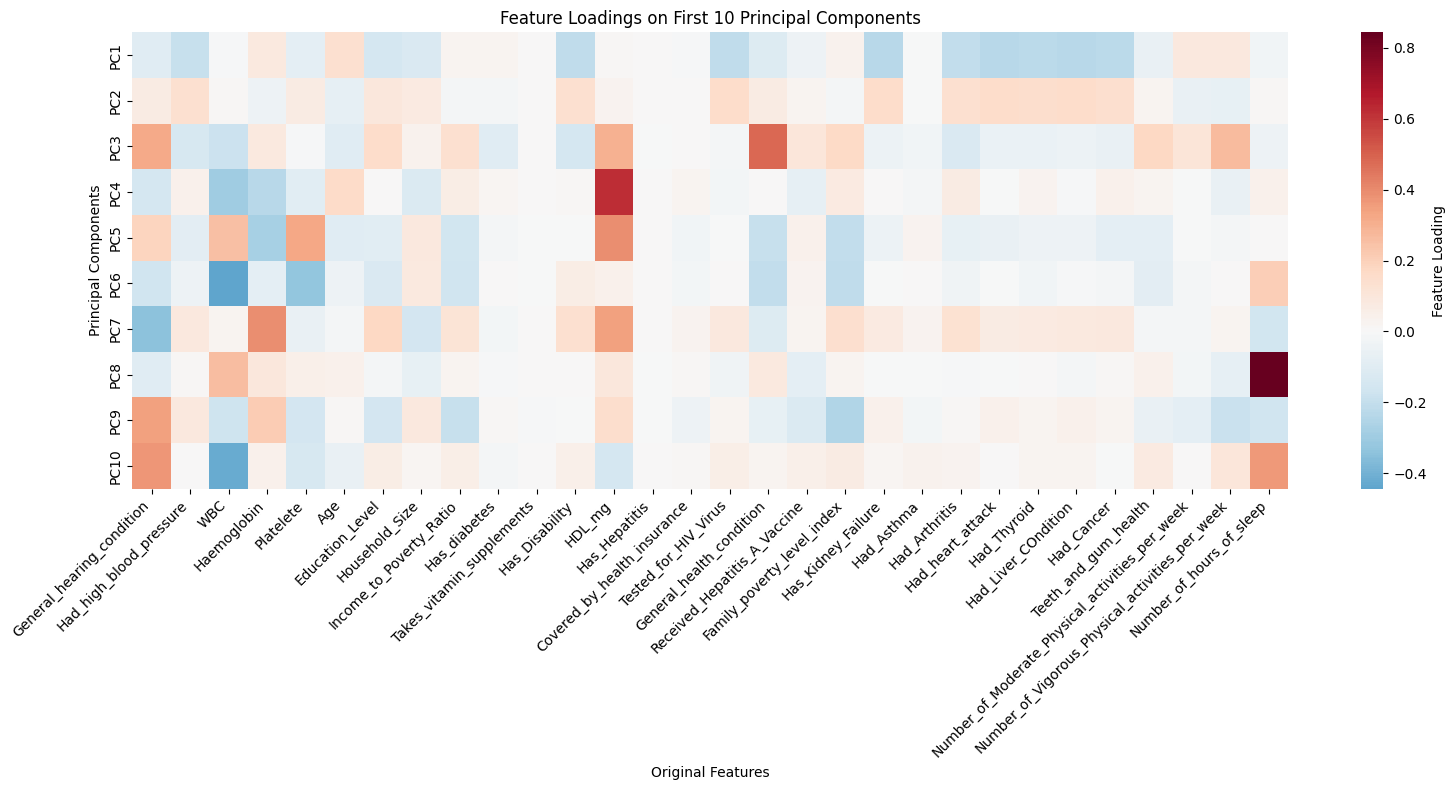

In [ ]:
import seaborn as sns

# Heatmap of loadings
n_components_to_show = min(10, n_components)
n_features_to_show = min(30, df.shape[1])

plt.figure(figsize=(16, 8))
sns.heatmap(
    components_df.iloc[:n_components_to_show, :n_features_to_show], 
    cmap='RdBu_r', 
    center=0,
    annot=False,
    cbar_kws={'label': 'Feature Loading'},
    xticklabels=True,
    yticklabels=True
)
plt.title(f'Feature Loadings on First {n_components_to_show} Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.376799,-1.592804,-1.267198,0.962760,0.117993,0.059561,-0.418425,0.939551,0.693580,-0.184694,-0.081679,-0.837100,-0.718674,0.475959,0.919189
1,0.142067,-1.490612,1.106270,-1.124167,0.234162,0.578796,-1.394856,0.376053,0.586987,-0.349497,-0.665617,1.884723,0.359816,-0.003061,-0.784697
2,0.417424,-1.607543,-0.689725,0.762300,-0.148889,-0.575386,-0.266385,-0.769881,1.053150,-0.937521,0.287713,-0.730627,-0.788397,0.182360,0.816661
3,0.521384,-1.724803,-0.448280,0.786240,-0.775905,-0.217022,0.155160,0.073606,0.249841,-0.802492,-0.027351,0.911777,-0.798448,0.608082,0.281516
4,-5.694743,2.437249,-0.859619,-0.227488,0.507501,-0.860211,-0.308672,0.215390,-0.193346,-1.165168,-1.197644,1.430171,0.329527,0.720048,-0.226170


In [ ]:
df_pca.to_csv('Data/pca_dataset.csv', index=False)
print("✓ Saved: pca_dataset.csv")

✓ Saved: pca_dataset.csv


### UMAP - Dimensionality Reduction Technique 2

In [ ]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ============================================================
# STEP 1: Load Your Scaled Data
# ============================================================
# Load the same scaled data you used for PCA
df = pd.read_csv('Data/df_scaled.csv')
df = df.drop(columns='Unnamed: 0')

In [ ]:
df.shape

(9442, 55)

In [ ]:
df.head()

,General_hearing_condition,Had_high_blood_pressure,WBC,Haemoglobin,Platelete,Age,Education_Level,Household_Size,Income_to_Poverty_Ratio,Has_diabetes,...,Race_Ethnicity_Other Hispanic,Race_Ethnicity_Other Race - Including Multi-Racial,Gender_Female,Gender_Male,Country_of_Birth_Born in 50 US states or Washington,Country_of_Birth_Unknown,Marital_Status_Married/Living with partner,Marital_Status_Never married,Marital_Status_Unknown,Marital_Status_Widowed/Divorced/Separated
0,0.0,1.0,-0.126195,0.071429,-0.206814,0.575,-0.5,-1.356915,-0.571698,0.0,...,0,0,1,0,1,0,0,1,0,0
1,0.0,0.0,0.061874,0.000000,0.133994,-0.400,-0.5,1.095512,-0.752830,0.0,...,0,0,0,1,0,1,1,0,0,0
2,0.0,1.0,-0.126195,0.071429,-0.206814,0.425,-0.5,-1.356915,-0.209434,0.0,...,0,0,1,0,1,0,0,1,0,0
3,-1.0,1.0,-0.126195,0.071429,-0.206814,0.650,0.0,-0.563171,-0.511321,0.0,...,0,0,0,1,1,0,0,0,0,1
4,0.0,2.0,1.395017,-0.714286,1.991652,-1.000,1.0,1.095512,-0.481132,0.0,...,0,1,0,1,1,0,0,0,1,0


In [ ]:
# ============================================================
# STEP 2: Determine Optimal UMAP Dimensions
# ============================================================
print("\n" + "="*60)
print("TESTING DIFFERENT UMAP DIMENSIONS")
print("="*60)

# Test different dimensions to see variance preservation
# We'll use clustering quality as a proxy since UMAP doesn't have explained variance
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

dimension_range = [5, 10, 15, 20, 25, 30]
metrics = {
    'dimensions': [],
    'silhouette': [],
    'davies_bouldin': []
}

for n_dim in dimension_range:
    print(f"\nTesting {n_dim} dimensions...")
    
    # Apply UMAP
    umap_test = umap.UMAP(
        n_components=n_dim,
        n_neighbors=15,
        min_dist=0.0,
        metric='euclidean',
        random_state=42
    )
    
    data_reduced = umap_test.fit_transform(df)
    
    # Test with clustering (k=5)
    kmeans_test = KMeans(n_clusters=5, random_state=42, n_init=10)
    labels = kmeans_test.fit_predict(data_reduced)
    
    # Calculate metrics
    sil = silhouette_score(data_reduced, labels)
    db = davies_bouldin_score(data_reduced, labels)
    
    metrics['dimensions'].append(n_dim)
    metrics['silhouette'].append(sil)
    metrics['davies_bouldin'].append(db)
    
    print(f"  Silhouette: {sil:.3f}")
    print(f"  Davies-Bouldin: {db:.3f}")

# Plot metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(metrics['dimensions'], metrics['silhouette'], 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of UMAP Dimensions')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score vs UMAP Dimensions (Higher = Better)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(metrics['dimensions'], metrics['davies_bouldin'], 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of UMAP Dimensions')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('Davies-Bouldin Index vs UMAP Dimensions (Lower = Better)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal dimensions
best_sil_idx = np.argmax(metrics['silhouette'])
best_db_idx = np.argmin(metrics['davies_bouldin'])

print(f"\n{'='*60}")
print(f"OPTIMAL DIMENSIONS")
print(f"{'='*60}")
print(f"Best by Silhouette: {metrics['dimensions'][best_sil_idx]} dimensions")
print(f"Best by Davies-Bouldin: {metrics['dimensions'][best_db_idx]} dimensions")


TESTING DIFFERENT UMAP DIMENSIONS

Testing 5 dimensions...


NameError: name 'umap' is not defined

In [ ]:
# ============================================================
# STEP 3: Apply UMAP with Chosen Dimensions
# ============================================================

# Choose dimensions
n_components_umap = 20 #Going with 20 because we need to look at half the number of components 

print(f"\n{'='*60}")
print(f"APPLYING UMAP WITH {n_components_umap} COMPONENTS")
print(f"{'='*60}")

umap_reducer = umap.UMAP(
    n_components=n_components_umap,
    n_neighbors=15,          # Controls local vs global structure (5-50)
    min_dist=0.0,            # 0.0 for clustering, 0.1-0.5 for visualization
    metric='euclidean',
    random_state=42,
    verbose=True
)

df_umap = umap_reducer.fit_transform(df)
joblib.dump(pca, 'Data/umap_model.pkl')
print(f"✓ UMAP model saved")


# Convert to DataFrame
umap_columns = [f'UMAP{i+1}' for i in range(n_components_umap)]
df_umap = pd.DataFrame(df_umap, columns=umap_columns)

print(f"\n{'='*60}")
print(f"UMAP RESULTS")
print(f"{'='*60}")
print(f"Original shape: {df.shape}")
print(f"Reduced shape: {df_umap.shape}")
print(f"Dimensionality reduction: {df.shape[1]} → {n_components_umap} features")
print(f"Features reduced by: {((df.shape[1] - n_components_umap) / df.shape[1] * 100):.1f}%")


APPLYING UMAP WITH 20 COMPONENTS
UMAP(min_dist=0.0, n_components=20, n_jobs=1, random_state=42, verbose=True)
Fri Nov  7 16:55:43 2025 Construct fuzzy simplicial set
Fri Nov  7 16:55:43 2025 Finding Nearest Neighbors
Fri Nov  7 16:55:43 2025 Building RP forest with 10 trees
Fri Nov  7 16:55:43 2025 NN descent for 13 iterations


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	Stopping threshold met -- exiting after 5 iterations
Fri Nov  7 16:55:44 2025 Finished Nearest Neighbor Search
Fri Nov  7 16:55:44 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Nov  7 16:56:33 2025 Finished embedding

UMAP RESULTS
Original shape: (9442, 55)
Reduced shape: (9442, 20)
Dimensionality reduction: 55 → 20 features
Features reduced by: 63.6%


In [ ]:
# ============================================================
# STEP 4: Analyze UMAP Components
# ============================================================

# UMAP doesn't have loadings like PCA, but we can check correlations
print(f"\n{'='*60}")
print(f"UMAP COMPONENT CORRELATIONS WITH ORIGINAL FEATURES")
print(f"{'='*60}")

# Calculate correlations between UMAP components and original features
correlations = []
for i in range(min(5, n_components_umap)):
    print(f"\n--- UMAP{i+1} ---")
    corr_with_features = df.corrwith(df_umap[f'UMAP{i+1}']).abs().sort_values(ascending=False)
    
    print("Top 10 Correlated Original Features:")
    for j, (feature, corr) in enumerate(corr_with_features.head(10).items(), 1):
        print(f"  {j}. {feature}: {corr:.3f}")


UMAP COMPONENT CORRELATIONS WITH ORIGINAL FEATURES

--- UMAP1 ---
Top 10 Correlated Original Features:
  1. Marital_Status_Unknown: 0.995
  2. Has_Kidney_Failure: 0.964
  3. Had_heart_attack: 0.962
  4. Had_Liver_COndition: 0.955
  5. Had_Thyroid: 0.907
  6. Had_Cancer: 0.901
  7. Has_Disability: 0.876
  8. Tested_for_HIV_Virus: 0.873
  9. Had_Arthritis: 0.819
  10. Had_high_blood_pressure: 0.801

--- UMAP2 ---
Top 10 Correlated Original Features:
  1. Marital_Status_Unknown: 0.866
  2. Has_Kidney_Failure: 0.843
  3. Had_heart_attack: 0.839
  4. Had_Liver_COndition: 0.834
  5. Had_Thyroid: 0.796
  6. Had_Cancer: 0.795
  7. Tested_for_HIV_Virus: 0.789
  8. Has_Disability: 0.752
  9. Had_Arthritis: 0.727
  10. Had_high_blood_pressure: 0.713

--- UMAP3 ---
Top 10 Correlated Original Features:
  1. Marital_Status_Unknown: 0.901
  2. Has_Kidney_Failure: 0.866
  3. Had_heart_attack: 0.864
  4. Had_Liver_COndition: 0.858
  5. Had_Thyroid: 0.826
  6. Had_Cancer: 0.817
  7. Tested_for_HIV_Viru

In [ ]:
# ============================================================
# STEP 6: Save Results
# ============================================================

# Save UMAP-reduced data for clustering
df_umap.to_csv('Data/umap_dataset.csv', index=False)

#### Notes:
- The two famous dimensionality reduction techniques are PCA and UMAP
- SVD is fien but works well for sparse datasets- our dataset is not sparse and is very dense so we ignore it
- Techniques like t-SNE are most likely used to visualize the results of the clusters after a clustering algorithm is run so that we can reduce the dimension of the dataframe for better visualization in 2D/3D